# Geometry #6
Visualize exmples with two dimensional cases

## Initialization

In [1]:
# Import pyKasso and other useful packages
import pykasso as pk
import numpy as np

In [2]:
# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 100,
    'nz' : 1,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(name='geometry_06', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

## x-y-model example

In [3]:
# Construct the bedrock
bedrock = np.append(np.linspace(500, 100, 50), np.linspace(100, 500, 50)) 
bedrock = np.repeat(bedrock[np.newaxis, :], 100, axis=0)

# Visualize the bedrock
# app.visualizer.mpl_plot_array_2D(bedrock)

In [4]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 6666,
        'algorithm' : 'Riemann3'
    },
    'domain' : {
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[994, 500]],
        'mode'       : 'domain_bottom',
    },
    'inlets' : {
        'number'     : 1,
        'data'       : [[0, 994]],
        'mode'       : 'domain_surface',
    },
}

In [5]:
# Compute karst conduit networks   
app.model.generate(model_parameters)

model_parameters['domain']['bedrock'] = bedrock
app.model.generate(model_parameters)

model_parameters['sks']['costs'] = {'ratio' : 0.1}
app.model.generate(model_parameters)

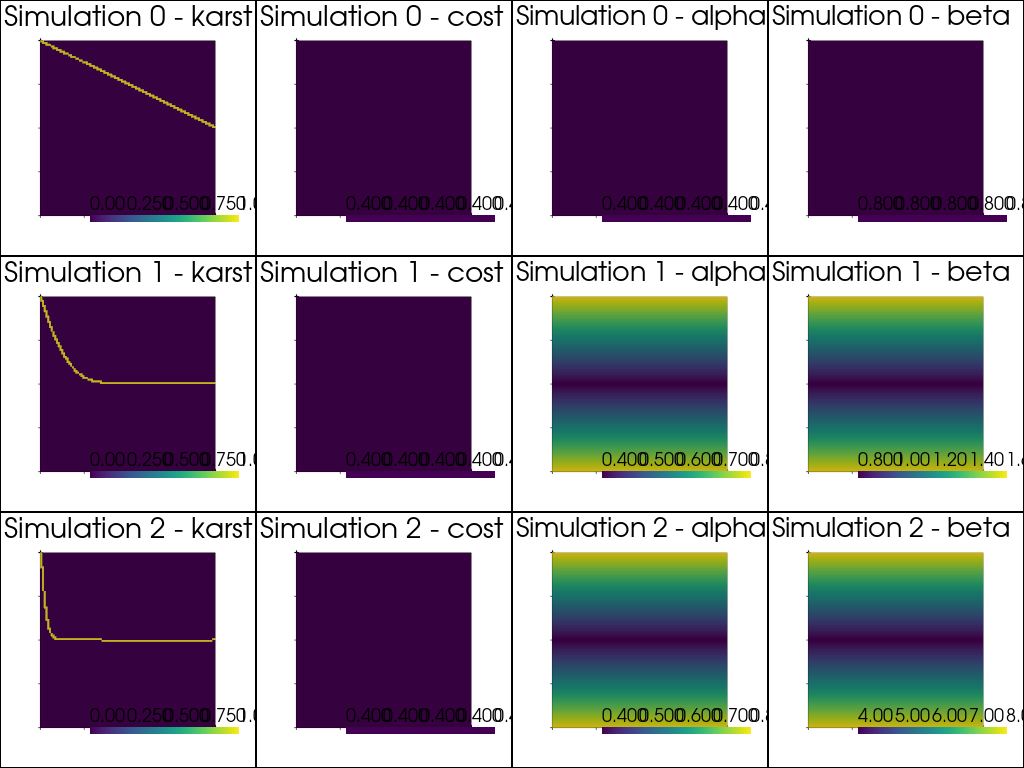

In [6]:
# Visualize the results
last_simulations = app.project.get_last_simulations(3)
# last_simulations
features=['karst', 'cost', 'alpha', 'beta']
app.visualizer.pv_show(
    simulations=last_simulations,
    features=features,
    cpos='xy',
)

## x-z-model example

In [7]:
# Declare the grid parameters
grid_parameters = {
    'x0' : 0,
    'y0' : 0,
    'z0' : 0,
    'nx' : 100,
    'ny' : 1,
    'nz' : 100,
    'dx' : 10,
    'dy' : 10,
    'dz' : 10
}

# Create a new project and declare its parameters
app.new_project(name='geometry_06b', grid_parameters=grid_parameters)
app.visualizer.notebook = True
nx, ny, nz = app.project.grid.shape

In [8]:
# Construct the water table
water_table = np.full((nx, ny), 500)
# app.visualizer.mpl_plot_array_2D(water_table)

In [9]:
# Construct the bedrock
bedrock = np.append(np.linspace(1100,100,50), np.linspace(100,1100,50)).reshape(100,1)
# app.visualizer.mpl_plot_array_2D(bedrock)

In [10]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 6666
    },
    'domain' : {
        'water_table' : water_table,
        'bedrock'     : bedrock
    },
    'outlets' : {
        'number'     : 1,
        'data'       : [[500, 0]],
        'subdomain'  : 'domain_bottom',
    },
    'inlets' : {
        'seed'       : 6,
        'number'     : 30,
        'importance' : [1,1,1],
        'subdomain'  : 'domain_surface',
    },
}

In [11]:
# Compute karst conduit networks
for algorithm in ['Isotropic3', 'Riemann3']:
    model_parameters['sks']['algorithm'] = algorithm
    app.model.generate(model_parameters)

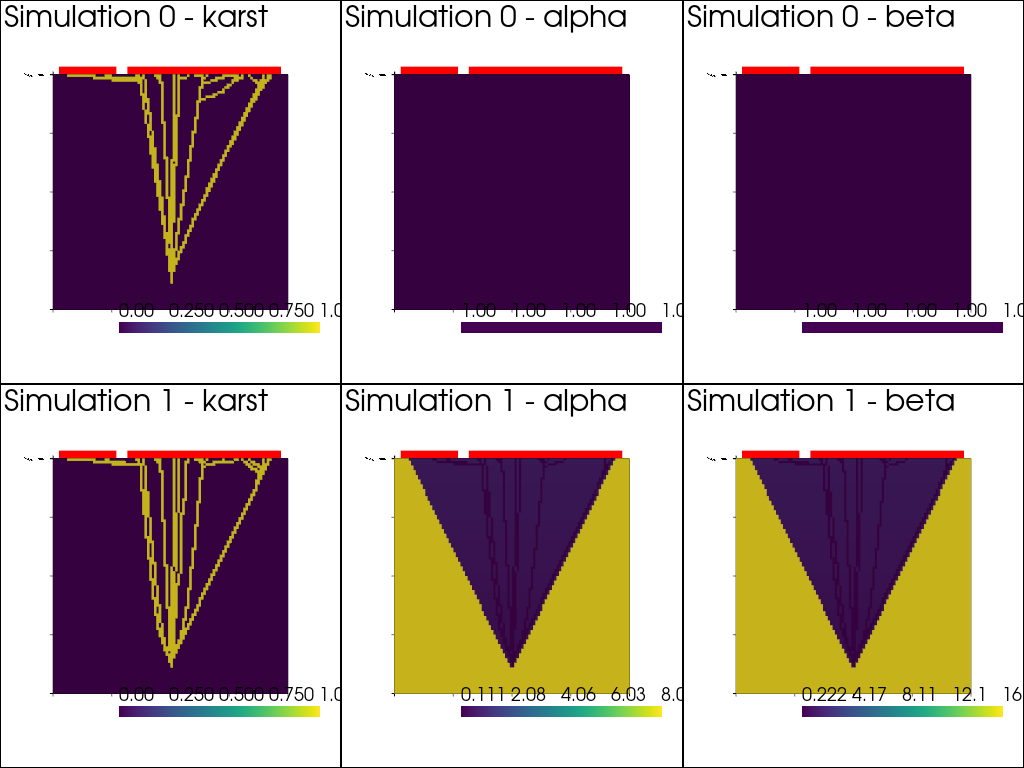

In [12]:
# Visualize the results
settings = {
    # 'ghost_values': [0, 8],
    'show_outline' : True,
    'inlets_options' : {},
    'outlets_options' : {},
    # 'surfaces_options' : {
    #     'topography' : {
    #         'opacity' : 0.5,
    #         'cmap': 'YlGn'
    #     },
    #     'bedrock' :  {
    #         'opacity' : 1,
    #         'cmap': 'copper'
    #     },
    #     'water_table' : {
    #         'opacity' : 0.5,
    #         'cmap': 'Blues_r'
    #     }
    # },
}
last_simulations = app.project.get_last_simulations(2)
features = ['karst', 'alpha', 'beta']
app.visualizer.pv_show(
    simulations=last_simulations,
    features=features,
    settings=settings,
)